#Mahalanobis Distance for bivariate (multivariate) outlier detection
`Dr. Tehreem Qasim`

`Data Mining sp24`

In [ ]:
dict1  = {'age':[20,20,45,46,25,48,49,23,39],
          'salary':[60000, 50000, 120000, 125000, 70000, 130000, 135000, 190000, 101000  ]}
#In the above dataset, we manually added abnormal row i.e., row 7 and we will see it the
# Mahalanobis distance method can detect this bivariate outlier

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(dict1)
df

,age,salary
0,20,60000
1,20,50000
2,45,120000
3,46,125000
4,25,70000
5,48,130000
6,49,135000
7,23,190000
8,39,101000


Frist we calculayte z score for each column values

In [ ]:
# At home go through how we can crate one list from another using list comprehension
Z_age=[(x-df.age.mean())/df.age.std() for x in df.age]
Z_salary = [ (x-df.salary.mean())/df.salary.std() for x in df.salary]



In [ ]:
df['z_age']= Z_age
df['z_sal']= Z_salary
df

,age,salary,z_age,z_sal
0,20,60000,-1.178511,-1.112416
1,20,50000,-1.178511,-1.339440
2,45,120000,0.785674,0.249726
3,46,125000,0.864242,0.363238
4,25,70000,-0.785674,-0.885392
5,48,130000,1.021376,0.476750
6,49,135000,1.099944,0.590262
7,23,190000,-0.942809,1.838892
8,39,101000,0.314270,-0.181619


We see above that the z-score does not find any outlier since the outlier we inserted on purpose is not uni-variate but bivariate in nature.

Now we will attempt to identify it using the Mahalanobis Distance method

In [ ]:
# We inserted two extra columns containing the z score into the original data frame df
# Lets create another data frame df1 containing the original two columns only
df1=df[['age', 'salary']]
cov_matrix = df1.cov().to_numpy()
inv_cov = np.linalg.inv(cov_matrix)

In [ ]:
# Now calculating the Mahalanobis disance
import math
mean_age= df.age.mean()
mean_sal= df.salary.mean()
Mah=[]
for i in range(len(df1)):
  result = np.dot(df1.iloc[i].to_numpy().reshape(1,-1) - np.array([mean_age,mean_sal]).reshape(1,-1)    , inv_cov)
  result1 = np.dot(result, df1.iloc[i].to_numpy().reshape(1,-1).transpose())
  result1 = np.sqrt(abs(result1[0][0]))
  Mah.append(result1)
df['Mah dist'] = Mah
df

,age,salary,z_age,z_sal,Mah dist
0,20,60000,-1.178511,-1.112416,1.536810
1,20,50000,-1.178511,-1.339440,1.523498
2,45,120000,0.785674,0.249726,1.627127
3,46,125000,0.864242,0.363238,1.763557
4,25,70000,-0.785674,-0.885392,1.429423
5,48,130000,1.021376,0.476750,1.978122
6,49,135000,1.099944,0.590262,2.106460
7,23,190000,-0.942809,1.838892,2.834484
8,39,101000,0.314270,-0.181619,0.764175


In the above data frame we can see that the Mahalanobis distance of the Row #7 is the higher compared to the other rows because we inserted a very high salary for a very low age compared to the other data points. We can also visualize the Mahalanobis distance of the whole dataset to look for any spikes which shows abnormal behavior for a particular row.



Text(0.5, 1.0, 'Mahalanobis Distance of different rows in the Dataset')

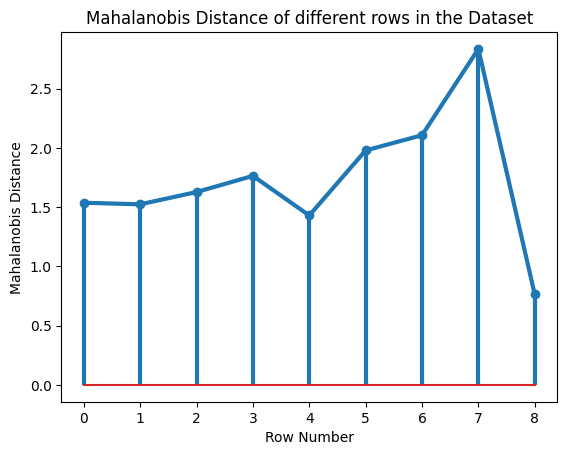

In [ ]:
from matplotlib import pyplot as plt
plt.plot(df['Mah dist'],linewidth=3)
markerline, stemlines, baseline = plt.stem(df['Mah dist'])
plt.setp(stemlines, 'linewidth', 3)
plt.xlabel('Row Number')
plt.ylabel('Mahalanobis Distance')
plt.title('Mahalanobis Distance of different rows in the Dataset')

We see in the plot above that for Row 7 the amplitude of the plot is higher compared to other rows which shows that it is an outlier.